In [166]:
!pip install celluloid


In [168]:
import numpy as np
from celluloid import Camera
import matplotlib.pyplot as plt

In [165]:
def evolve(lattice):
    """Conway Game of life"""
    x = np.shape(lattice)[0]
    y = np.shape(lattice)[1]
    
    lattice2 = np.copy(lattice) #without this line we have a maze generator!!!!!
    
    for i in range(0,x):
        for j in range(0,y):
            sum = 0
            for k in [-1,0,1]:
                for l in [-1,0,1]:
                    if not (k ==0 and l ==0):     
                        sum = sum + lattice[(i+k)%x][(j+l)%y]            
            if lattice[i][j] == 0:
                if sum == 3: 
                    lattice2[i][j] = 1 #reproduction 
            elif lattice[i][j] == 1:
                if sum > 3: 
                    lattice2[i][j] = 0 #overpopulation
                elif sum in [2,3]: 
                    lattice2[i][j] = 1 #stasis
                elif sum in [0,1]: 
                    lattice2[i][j] = 0 #underpopulation
    return lattice2

In [ ]:
def generate_lattice(n,p):
    lattice = np.zeros([n,n], dtype='int')
    for i in range(0,n):
        for j in range(0,n):
            if np.random.uniform() < p:
                lattice[i,j]=1
    return lattice

def generate_lattice_pq(n,p,q):
    lattice = np.zeros([n,n], dtype='int')
    for i in range(0,n):
        for j in range(0,n):
            if i > p and i < q and j > p and j < q:
                lattice[i,j]=1
    return lattice

In [169]:
X =  generate_lattice_pq(31,11,15)

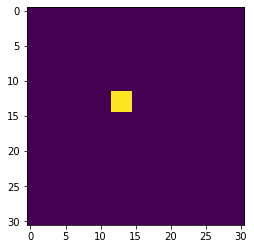

In [170]:
plt.imshow(X)

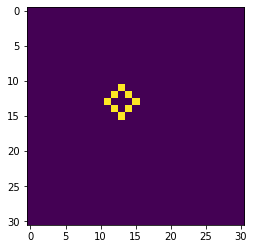

In [171]:
plt.imshow(evolve(X))

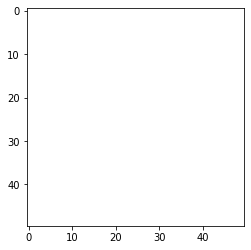

In [176]:
Y =  generate_lattice(50,0.5)
fig = plt.figure()
camera = Camera(fig)
for i in range(1,100):
    plt.imshow( Y, cmap = 'magma')
    Y =  evolve(Y)
    camera.snap()
animation = camera.animate()
animation.save('gameoflife3.gif', writer = 'pillow')

In [177]:
from google.colab import files
files.download( "gameoflife3.gif" )    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#viterbi

In [ ]:
obs = ("normal", "cold", "dizzy")
states = ("Healthy", "Fever")
start_p = {"Healthy": 0.6, "Fever": 0.4}
trans_p = {
    "Healthy": {"Healthy": 0.7, "Fever": 0.3},
    "Fever": {"Healthy": 0.4, "Fever": 0.6},
}
emit_p = {
    "Healthy": {"normal": 0.5, "cold": 0.4, "dizzy": 0.1},
    "Fever": {"normal": 0.1, "cold": 0.3, "dizzy": 0.6},
}